In [4]:
import tensorflow as tf

In [5]:
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [6]:
fashion_mnist=keras.datasets.fashion_mnist

In [7]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

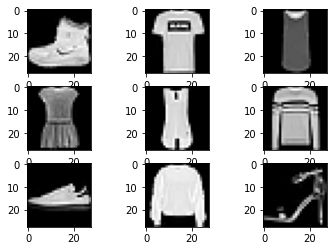

In [8]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train.dtype

dtype('uint8')

In [11]:
X_valid=X_train[50000:60000]/255.0

In [12]:
X_train=X_train[0:50000]/255.0

In [13]:
y_valid=y_train[50000:60000]

In [14]:
y_train=y_train[0:50000]

In [15]:
X_train.shape

(50000, 28, 28)

In [16]:
X_valid.shape

(10000, 28, 28)

In [17]:
y_valid.shape

(10000,)

In [18]:
class_names=["T-shirt","Trouser","Pullover","Dress","coat","Sandal","Shirt","Sneaker","bag","Angle boat"]

In [19]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2023-02-14 19:40:02.083192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


weights,biases=hidden1.get_weights()

In [20]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=["accuracy"])

In [21]:
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4959 - accuracy: 0.8218 - val_loss: 0.4207 - val_accuracy: 0.8520
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3660 - accuracy: 0.8659 - val_loss: 0.3687 - val_accuracy: 0.8693
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3338 - accuracy: 0.8761 - val_loss: 0.3457 - val_accuracy: 0.8745
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3069 - accuracy: 0.8865 - val_loss: 0.3335 - val_accuracy: 0.8802
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2852 - accuracy: 0.8932 - val_loss: 0.3484 - val_accuracy: 0.8750
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2708 - accuracy: 0.8986 - val_loss: 0.3387 - val_accuracy: 0.8757
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2598 - accuracy: 0.9008 - val_loss: 0.3257 - val_accuracy:

In [22]:
history2=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1526 - accuracy: 0.9412 - val_loss: 68.9876 - val_accuracy: 0.8810
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1508 - accuracy: 0.9425 - val_loss: 80.1642 - val_accuracy: 0.8762
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1444 - accuracy: 0.9451 - val_loss: 88.9857 - val_accuracy: 0.8645
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1412 - accuracy: 0.9460 - val_loss: 79.9146 - val_accuracy: 0.8745
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1358 - accuracy: 0.9478 - val_loss: 91.7434 - val_accuracy: 0.8689
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1348 - accuracy: 0.9487 - val_loss: 99.9006 - val_accuracy: 0.8609
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1307 - accuracy: 0.9495 - val_loss: 93.3824 - val_ac

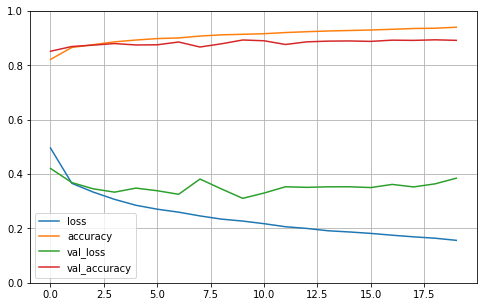

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)#betweeon 0 and 1
plt.show()

In [24]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 117.9106 - accuracy: 0.8789


[117.9106216430664, 0.8788999915122986]

In [25]:
predictions=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [26]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

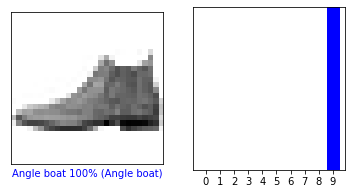

In [27]:
import matplotlib.pyplot as plt 
import numpy as np
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

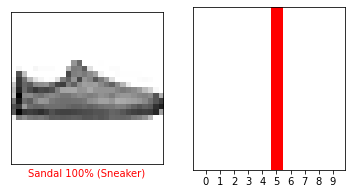

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

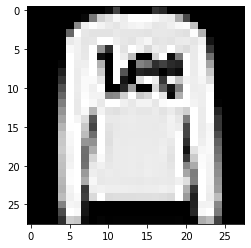

In [29]:
plt.imshow(X_test[1].reshape((28,28)),cmap='gray')

In [30]:
predx=X_test[1].reshape((28,28,1))

In [31]:
predx.shape

(28, 28, 1)

In [32]:
predict_y=model.predict(predx)

1/1 [==============================] - 0s 56ms/step


In [33]:
classes_x=np.argmax(predict_y,axis=1)

In [34]:
classes_x=classes_x[0]
print(classes_x)

2


In [35]:
class_names

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'bag',
 'Angle boat']

In [36]:
class_names[classes_x]

'Pullover'